In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\Users\shams\downloads\ss\Dataset_SOO.csv')
df

,roadway,pjt_id,x,y,start_yr,end_yr,cor,sor,orig_days,modified_days,...,pop_density,p_type,c_type,ROAD_DIREC,District,COUNTYDOT,MNG_DIST,Vendor_Name,Longitude,Latitude
0,11470000,E8Q92,420914.1858,3170156.739,2018.0,2019,1.144067,1.396825,315,440,...,0.167195,3R,Conv,8,TURNPIKE,11,8,"D.A.B. CONSTRUCTORS, INC.",-81.809291,28.656131
1,91090000,T1715,505488.8195,3023373.764,2018.0,2019,1.000000,1.296000,125,162,...,0.089958,Others,Conv,3,FIRST,91,1,LYNCH PAVING & CONSTRUCTION CO.,-80.944513,27.333484
2,91060000,E1R41,525735.7132,3008952.114,2019.0,2019,1.000000,1.087500,80,87,...,0.118496,3R,Conv,3,FIRST,91,1,"C.W. ROBERTS CONTRACTING, INC.",-80.740139,27.203052
3,71110000,T2682,407277.4066,3304787.047,2018.0,2019,1.051825,1.565714,350,548,...,0.136987,Bridge,Conv,2,SECOND,71,2,COMMERCIAL INDUSTRIAL CORP.,-81.960107,29.870178
4,79180000,E5Z21,501358.4489,3227818.900,2018.0,2019,1.000000,1.242857,280,348,...,0.159978,Bridge,Conv,1,FIFTH,79,5,"INTECH CONTRACTING, LLC",-80.986029,29.179011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,93470000,E8Q54,583857.6310,2947548.615,2017.0,2019,1.021066,1.819048,315,573,...,0.062751,3R,Conv,1,TURNPIKE,93,8,COMMUNITY ASPHALT CORP.,-80.157428,26.646403
284,12070000,E1R51,428615.6593,2940736.728,2019.0,2019,1.000000,1.412121,165,233,...,0.110152,3R,LS,3,FIRST,12,1,COMMUNITY ASPHALT CORP.,-81.716870,26.585590
285,13010001,T1697,344760.9712,3043049.990,2018.0,2019,1.019477,1.190000,200,238,...,0.217293,Others,Conv,1,FIRST,13,1,"GOSALIA CONCRETE CONSTRUCTORS, INC.",-82.571599,27.502256
286,93310000,T4492,577443.4125,2970747.693,2019.0,2019,1.000000,1.048889,225,236,...,0.096583,3R,Conv,4,FOURTH,93,4,"J.W. CHEATHAM, LLC",-80.220443,26.856213


## 1. Handling missing values
The dataset contains missing values for some variables. 
First, we identify the variables with missing values. 
Then, due to the identical characteristics of each variable, NaN values are handled manually.

In [3]:
#Identifying variables having missing values
nan_count = df.isna().sum()
nan_count_only = nan_count[nan_count > 0]
print(nan_count_only)

start_yr        1
aadt           13
aadt_truck     13
speedlimit     29
access_con     19
access_cla     44
pav_cond       13
funclass       19
road_side      13
no_lane        13
bridge         56
railcross     192
dtype: int64


In [4]:
#Since each variable has specific characteristic, handeling missing values is performed manually
df['start_yr']   = df['start_yr'].fillna(df['start_yr'].mode()[0])
df['aadt']       = df['aadt'].fillna(df['aadt'].mean())
df['aadt_truck'] = df['aadt_truck'].fillna(df['aadt_truck'].mean())
df['speedlimit'] = df['speedlimit'].fillna(df['speedlimit'].mode()[0])
df['access_con'] = df['access_con'].fillna(df['access_con'].mode()[0])
df['access_cla'] = df['access_cla'].fillna(4).astype(float)
df['pav_cond']   = df['pav_cond'].fillna(3.5).astype(float)
df['funclass']   = df['funclass'].fillna(12).astype(float)
df['road_side']  = df['road_side'].fillna('R').astype(str)
df['no_lane']    = df['no_lane'].fillna(2).astype(float)
df['bridge']     = df['bridge'].fillna(0).astype(float)
df['railcross']  = df['railcross'].fillna(0).astype(float)

In [5]:
#checking missing values again
nan_count = df.isna().sum()
nan_count_only = nan_count[nan_count > 0]
print(nan_count_only)

Series([], dtype: int64)


## 2. Calcualting Schedule Overrun Occurnce
Schedule Overrun Occurnce is calculated based on Schedule_Overrun_Ratio = (actual_days-orig_days)/orig_days
Then, the calculated SOO is transforrmed into binary as target (No SOO = 0 and SOO=1)

In [6]:
#The log of results will be placed in SORA
df['Schedule_Overrun_Ratio'] = (df['actual_days'] - df['orig_days'])/df['orig_days']
df['SORA'] = 1 * (df['Schedule_Overrun_Ratio'] > 0)

In [7]:
#Removing Schedule Overrun Ratio Column
df = df.drop(['Schedule_Overrun_Ratio'], axis=1)

0.8194444444444444


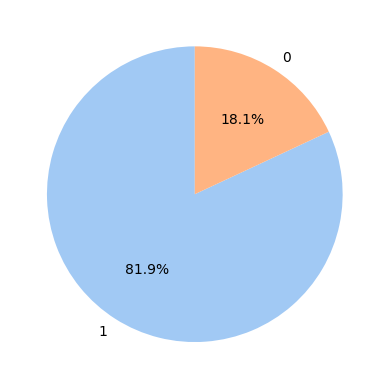

In [8]:
''' Getting the ratio of the projects with schedule overrun and without schedule overrun
    The ratio shows that approximately 82% of the projects faced schedule overrun
    Normally projects face schedule overrun, refer to the threshold for fraud and cancer detection'''
print(df[df['SORA'] == 1].count()['SORA'] / df['SORA'].count())
counts = df['SORA'].value_counts()
plt.pie(counts, labels=(df['SORA'].value_counts()).index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.show()

## 3. Encoding categorical variables and removing unnecessary variables

In [9]:
#defining a function using sklearn LabelEncoder to encode categorical variables

def cat_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    df = df.drop(columns=columns, axis=1)
    return df

columns = ['p_type', 'c_type', 'Urbanization', 'WATER_MANA', 'road_side']
df = cat_encode(df, columns)

df.reset_index(drop=True, inplace=True)

In [10]:
df[['p_type_encoded', 'c_type_encoded', 'Urbanization_encoded', 'WATER_MANA_encoded', 'road_side_encoded']]

,p_type_encoded,c_type_encoded,Urbanization_encoded,WATER_MANA_encoded,road_side_encoded
0,0,0,1,2,2
1,3,0,1,1,0
2,0,0,1,1,0
3,1,0,0,2,0
4,1,0,4,2,2
...,...,...,...,...,...
283,0,0,3,1,2
284,0,2,5,1,0
285,3,0,3,4,0
286,0,0,0,1,2


In [11]:
#Removing Unncessary variables such as project id
#Removing Duplicate Variables (e.g. Land use code, land use level 1, and land use level 2 are similar - Keeping one variable)

In [12]:
df = df.drop(['prec_2019', 'prec_2018', 'prec_2017', 'prec_2016', 'prec_2015', 'prec_2014', 'prec_2013', 'prec_2012',
'prec_2011', 'prec_2010', 'prec_mean_100yr_1901_2000', 'max_temp_2019', 'max_temp_2018', 'max_temp_2017', 'max_temp_2016', 
'max_temp_2015' , 'max_temp_2014' , 'max_temp_2013','max_temp_2012' , 'max_temp_2011' , 'max_temp_2010' , 'max_temp_mean_max_100yr_1901_2000',
'avg_temp_2019', 'avg_temp_2018', 'avg_temp_2017', 'avg_temp_2016' , 'avg_temp_2015' , 'avg_temp_2014' , 'avg_temp_2013' ,
'avg_temp_2012' , 'avg_temp_2011' , 'avg_temp_2010' , 'avg_temp_mean_100yr_1901_2000', 
'gdp_2018', 'gdp_2017', 'gdp_2016' , 'gdp_2015' , 'gdp_2014' , 'gdp_2013' ,
'gdp_2012' , 'gdp_2011' , 'gdp_2010' , 'gdp_2009' ,'avg_temp_mean_100yr_1901_2000', 
'unemp_2019', 'unemp_2018', 'unemp_2017', 'unemp_2016' , 'unemp_2015' , 'unemp_2014' , 'unemp_2013' ,
'unemp_2012' , 'unemp_2011' , 'unemp_2010' , 'unemp_2009', 'Vendor_Name', 'roadway', 'urban_rural', 'MNG_DIST', 'sor', 'x', 'y', 
'actual_amounts', 'modified_amounts', 'modified_days', 'LANDCOVER_', 'actual_days', 'Landuse_lv_1', 'Landuse_lv_2', 'pjt_id', 'District'], axis=1)
df.reset_index(drop=True, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_yr                288 non-null    float64
 1   end_yr                  288 non-null    int64  
 2   cor                     288 non-null    float64
 3   orig_days               288 non-null    int64  
 4   orig_amounts            288 non-null    float64
 5   aadt                    288 non-null    float64
 6   aadt_truck              288 non-null    float64
 7   speedlimit              288 non-null    float64
 8   access_con              288 non-null    float64
 9   access_cla              288 non-null    float64
 10  pav_cond                288 non-null    float64
 11  funclass                288 non-null    float64
 12  no_lane                 288 non-null    float64
 13  bridge                  288 non-null    float64
 14  railcross               288 non-null    fl

In [14]:
#df.to_excel('All_Dataset_Ready_for_Analysis.csv', index=False)